In [5]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import string
import nltk



In [143]:
combi=pd.read_csv(r'C:\Users\Sourav\Desktop\tweets.csv')


In [144]:
print(combi)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
5      570300767074181121          negative                        1.0000   
6      570300616901320704          positive                        0.6745   
7      570300248553349120           neutral                        0.6340   
8      570299953286942721          positive                        0.6559   
9      570295459631263746          positive                        1.0000   
10     570294189143031808           neutral                        0.6769   
11     570289724453216256          positive                        1.0000   

In [145]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [147]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")

In [153]:
print(combi[tidy_tweet])

0                                              What  said 
1         plus you ve added commercials to the experien...
2         I didn t today    Must mean I need to take an...
3         it s really aggressive to blast obnoxious  en...
4                 and it s a really big bad thing about it
5         seriously would pay     a flight for seats th...
6         yes  nearly every time I fly VX this  ear wor...
7         Really missed a prime opportunity for Men Wit...
8                         Well  I didn t but NOW I DO    D
9         it was amazing  and arrived an hour early  Yo...
10        did you know that suicide is the second leadi...
11        I  lt   pretty graphics  so much better than ...
12        This is such a great deal  Already thinking a...
13         I m flying your #fabulous #Seductive skies a...
14                                                 Thanks 
15                          SFO PDX schedule is still MIA 
16        So excited for my first cross country flight .

In [150]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [154]:
print(combi[tidy_tweet])

0                                              What  said 
1         plus you ve added commercials to the experien...
2         I didn t today    Must mean I need to take an...
3         it s really aggressive to blast obnoxious  en...
4                 and it s a really big bad thing about it
5         seriously would pay     a flight for seats th...
6         yes  nearly every time I fly VX this  ear wor...
7         Really missed a prime opportunity for Men Wit...
8                         Well  I didn t but NOW I DO    D
9         it was amazing  and arrived an hour early  Yo...
10        did you know that suicide is the second leadi...
11        I  lt   pretty graphics  so much better than ...
12        This is such a great deal  Already thinking a...
13         I m flying your #fabulous #Seductive skies a...
14                                                 Thanks 
15                          SFO PDX schedule is still MIA 
16        So excited for my first cross country flight .

In [155]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: print(combi[tidy_tweet])' '.join([w for w in x.split() if len(w)>3]))

In [156]:
print(combi[tidy_tweet])

0                                                What said
1                  plus added commercials experience tacky
2              didn today Must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                       really thing about
5        seriously would flight seats that didn have th...
6                         nearly every time this worm away
7        Really missed prime opportunity Without Hats p...
8                                                Well didn
9                          amazing arrived hour early good
10       know that suicide second leading cause death a...
11       pretty graphics much better than minimal icono...
12       This such great deal Already thinking about tr...
13       flying your #fabulous #Seductive skies again t...
14                                                  Thanks
15                                          schedule still
16       excited first cross country flight heard nothi.

In [157]:
#tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: tidy_tweet, dtype: object

In [158]:
from nltk.stem.porter import *

In [159]:
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                         [what, said]
1                   [plu, ad, commerci, experi, tacki]
2    [didn, today, must, mean, need, take, anoth, t...
3    [realli, aggress, blast, obnoxi, entertain, yo...
4                               [realli, thing, about]
Name: tidy_tweet, dtype: object

In [160]:
#joining tokens back 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [161]:
tokenized_tweet.head()

0                                            what said
1                         plu ad commerci experi tacki
2            didn today must mean need take anoth trip
3    realli aggress blast obnoxi entertain your gue...
4                                   realli thing about
Name: tidy_tweet, dtype: object

In [162]:
print(combi[tidy_tweet])

0                                                what said
1                             plu ad commerci experi tacki
2                didn today must mean need take anoth trip
3        realli aggress blast obnoxi entertain your gue...
4                                       realli thing about
5        serious would flight seat that didn have thi p...
6                          nearli everi time thi worm away
7        realli miss prime opportun without hat parodi ...
8                                                well didn
9                               amaz arriv hour earli good
10       know that suicid second lead caus death among ...
11       pretti graphic much better than minim iconographi
12       thi such great deal alreadi think about trip h...
13       fli your #fabul #seduct sky again take #stress...
14                                                   thank
15                                           schedul still
16       excit first cross countri flight heard noth gr.

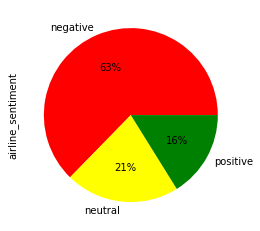

In [164]:
combi.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

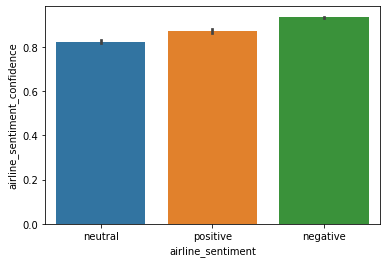

In [166]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=combi)

In [195]:
combi.shape

(14640, 16)

In [190]:
combi.airline_sentiment.shape

(14640,)

In [205]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(combi.tidy_tweet).toarray()

In [221]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(processed_features,combi.airline_sentiment, test_size=0.2, random_state=0)

In [222]:

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test) 

C:\Users\Sourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [223]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7824453551912568
